<a href="https://colab.research.google.com/github/lauranorenab/Proyecto_Modelos_2/blob/main/Decision_Tree_Classifier_Car_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, cohen_kappa_score, matthews_corrcoef
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.utils.multiclass import unique_labels
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import pandas as pd
import numpy as np

# Descripción

Este colab tiene como objetivo explorar la efectividad del modelo de "Decision Tree Classifier" en un conjunto de datos desbalanceado y en otro balanceado con la técnica de SMOTE.

# Lectura de los datasets

## Dataset desbalanceado

In [ ]:
df_car_unbalanced = pd.read_csv("car_evaluation_unbalanced.csv")
X_unbalanced = df_car_unbalanced.iloc[:, :-1]
y_unbalanced = df_car_unbalanced.iloc[:, -1].to_numpy().reshape(len(df_car_unbalanced.iloc[:, -1]),1)

In [ ]:
X_unbalanced.shape, y_unbalanced.shape

((1728, 6), (1728, 1))

## Dataset balanceado con SMOTE

In [ ]:
df_car_smote = pd.read_csv("car_evaluation_smote.csv")
X_smote = df_car_smote.iloc[:, :-1]
y_smote = df_car_smote.iloc[:, -1].to_numpy().reshape(len(df_car_smote.iloc[:, -1]),1)

In [ ]:
X_smote.shape, y_smote.shape

((4840, 6), (4840, 1))

# Split de los datos

**Se realiza una división de los conjutos de datos, donde el 70% se usará para entrenamiento y el 30% restante para testeo**

## Dataset Desbalanceado

In [ ]:
X_unbalanced_train, X_unbalanced_test, y_unbalanced_train, y_unbalanced_test = train_test_split(X_unbalanced, y_unbalanced, test_size=0.3, random_state=10)

In [ ]:
X_unbalanced_train.shape, X_unbalanced_test.shape, y_unbalanced_train.shape, y_unbalanced_test.shape

((1209, 6), (519, 6), (1209, 1), (519, 1))

## Dataset balanceado con SMOTE

In [ ]:
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=10)

In [ ]:
X_smote_train.shape, X_smote_test.shape, y_smote_train.shape, y_smote_test.shape

((3388, 6), (1452, 6), (3388, 1), (1452, 1))

# Modelado y validación

## Búsqueda de mejores hiperparámetros

**Con el fin de optimizar el rendimiento del modelo, se usó 'GridSearchCV' para ajustar adecuadamente los hiperpárametros del algoritmo. Para este caso, solo estaremos evaluando los parámetros 'criterion' y 'max_depth'.**

In [ ]:
# Crear el modelo XGBRegressor
modelDT = DecisionTreeClassifier()

# Se definen los posibles parametros
tree_param = {
    'criterion':['gini','entropy'],
    'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]
    }

gsearch = GridSearchCV(
    estimator = modelDT,
    param_grid = tree_param,
    cv=5
    )

## Entrenamiento y predicción

**Después de haber identificado los mejores hiperparámetros para el modelo, procedemos a entrenarlo utilizando tanto el conjunto de datos desbalanceado como el conjunto de datos balanceado.**

### Dataset desbalanceado

In [ ]:
# Entrenamiento usando los mejores hiperpárametros obtenidos
gsearch.fit(X_unbalanced_train,y_unbalanced_train)

# Se obtiene el modelo con los mejores hiperparámetros seleccionados
best_model_unbalanced = gsearch.best_estimator_

# Se realiza la predicción con los datos de test
y_unbalanced_pred = best_model_unbalanced.predict(X_unbalanced_test)

### Dataset balanceado con SMOTE

In [ ]:
# Entrenamiento usando los mejores hiperpárametros obtenidos
gsearch.fit(X_smote_train,y_smote_train)

# Se obtiene el modelo con los mejores hiperparámetros seleccionados
best_model_smote = gsearch.best_estimator_

# Se realiza la predicción con los datos de test
y_smote_pred = best_model_smote.predict(X_smote_test)

## Evaluación de métricas

**Para medir el desempeño del modelo, se utilizaron una variedad de métricas diferentes. Esto se hizo con el fin de tener una visión más general del comportamiento del modelo desde diferentes perspectivas, ya que, cada una de las métricas seleccionadas aborda un aspecto especifico del rendimiento del modelo, lo que nos permite realizar una evaluación más completa y precisa de su capacidad predictiva.**

**Las métricas seleccionadas con las siguientes:**


*   **Accuracy:** Representa la proporción de todas las clases correctamente predichas sobre el total de predicciones realizadas para todas las clases.
*   **AUC:** Proporciona una medida de la capacidad del modelo para distingir cada una de las clases.
*   **Recall:** Representa la proporción de instancias positivas reales que fueron correctamente identificadas por el modelo.
*   **Precision:** Proporción de instancias positivas identificadas correctamente por el modelo sobre todas las instancias identificadas como positivas.
*   **F1 Score:** Media armónica de precision y recall. Proporciona una medida balanceada del rendimiento del modelo.
*   **Cohen's Kappa:** Mide la concordancia entre las predicciones del modelo y las clases reales, teniendo en cuenta la posibilidad de que las predicciones ocurran por azar.
*   **MCC:** Tiene en cuenta tanto los verdaderos positivos como los verdaderos negativos, proporcionando una medida de la calidad general del modelo.



In [ ]:
def show_bar_graphic(valores):
  metricas = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1 Score', "Cohen's Kappa", 'MCC']

  # Crear un gráfico de barras
  plt.figure(figsize=(10, 6))
  sns.barplot(x=metricas, y=valores, hue=metricas, palette='viridis', legend=False)
  plt.title('Métricas de Evaluación')
  plt.xlabel('Métrica')
  plt.ylabel('Valor')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [ ]:
def show_spider_graph(valores):
  metricas = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1 Score', "Cohen's Kappa", 'MCC']

  # Crear un gráfico de radar
  angulos = np.linspace(0, 2*np.pi, len(metricas), endpoint=False).tolist()
  val_aux = valores.copy()
  val_aux += val_aux[:1]
  angulos += angulos[:1]

  fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))
  plt.title('Métricas de Evaluación', size=20, y=1.1)
  ax.fill(angulos, val_aux, color='skyblue', alpha=0.6)
  ax.plot(angulos, val_aux, color='blue', linewidth=1)
  ax.set_yticklabels([])
  ax.set_xticks(angulos[:-1])
  ax.set_xticklabels(metricas, size=8)
  plt.show()

In [ ]:
def show_table(valores):
  metricas = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1 Score', "Cohen's Kappa", 'MCC']
  df_metricas = pd.DataFrame({'Métrica': metricas, 'Valor': valores})

  return df_metricas

### Dataset desbalanceado

In [ ]:
accuracy_unbalanced = accuracy_score(y_unbalanced_test, y_unbalanced_pred)

precision_unbalanced = precision_score(y_unbalanced_test, y_unbalanced_pred, average='weighted')

y_pred_proba_un = best_model_unbalanced.predict_proba(X_unbalanced_test)
auc_unbalanced = roc_auc_score(y_unbalanced_test.tolist(), y_pred_proba_un.tolist(), multi_class='ovr')

recall_unbalanced = recall_score(y_unbalanced_test, y_unbalanced_pred, average='weighted')

f1_unbalanced = f1_score(y_unbalanced_test, y_unbalanced_pred, average='weighted')

mcc_unbalanced = matthews_corrcoef(y_unbalanced_test, y_unbalanced_pred)

kappa_unbalanced = cohen_kappa_score(y_unbalanced_test, y_unbalanced_pred)

In [ ]:
valores_unbalanced = [accuracy_unbalanced, auc_unbalanced, recall_unbalanced, precision_unbalanced, f1_unbalanced, kappa_unbalanced, mcc_unbalanced]

In [ ]:
show_table(valores_unbalanced)

,Métrica,Valor
0,Accuracy,0.984586
1,AUC,0.964669
2,Recall,0.984586
3,Precision,0.984371
4,F1 Score,0.984353
5,Cohen's Kappa,0.965325
6,MCC,0.965375


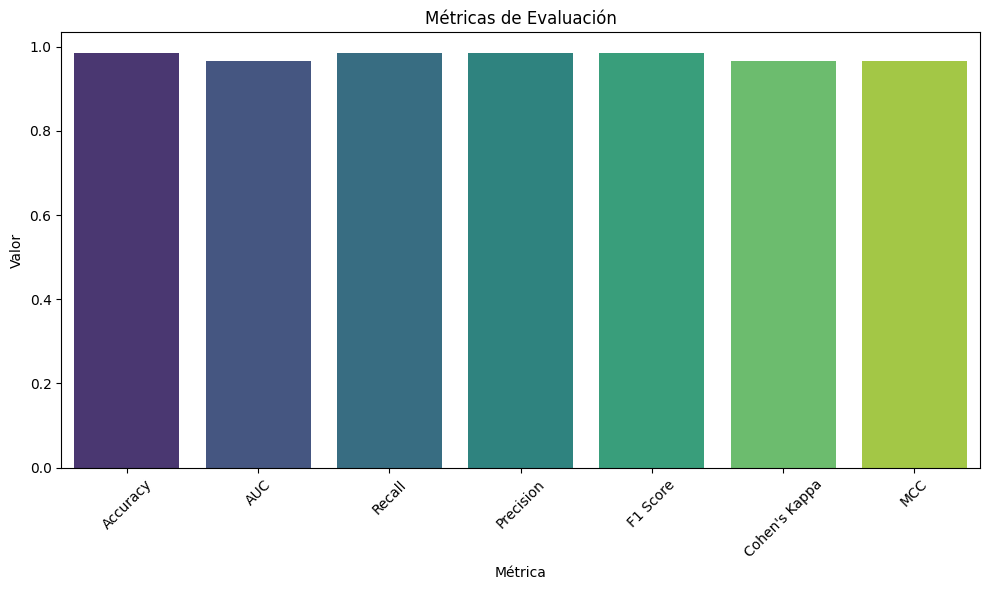

In [ ]:
show_bar_graphic(valores_unbalanced)

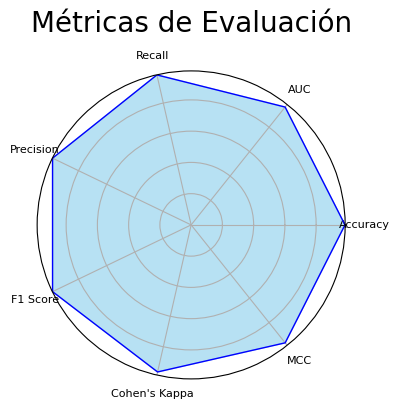

In [ ]:
show_spider_graph(valores_unbalanced)

**Conclusiones:**
Los resultados de las métricas de evaluación muestan un buen rendimiento del modelo en un conjunto de datos que se encuentra desbalanceado.
* El accuracy del 98.46% indica una precisión general alta, sin embargo, debido a que el dataset se encuentra debalanceado, el modelo puede estar sesgado y este valor puede indicar que se identifica correctamente la clase mayoritaria pero las demas no.
* El AUC del 96.46% nos indica que el modelo tiene una buena capacidad para distinguir entre clases.
* El recall y la precisión del 98.46% indican una buena capacidad para identificar y clasificar correctamente las clases positivas.
* El F1 Score del 98.46% muestra un buen equilibrio entre precision y recall.
* Cohen's Kappa y MCC nos indican una concordancia buena y una relación positiva entre las predicciones del modelo y las clases reales.

### Dataset balanceado con SMOTE

In [ ]:
accuracy_smote = accuracy_score(y_smote_test, y_smote_pred)

precision_smote = precision_score(y_smote_test, y_smote_pred, average='weighted')

y_pred_proba_smote = best_model_smote.predict_proba(X_smote_test)
auc_smote = roc_auc_score(y_smote_test.tolist(), y_pred_proba_smote.tolist(), multi_class='ovr')

recall_smote = recall_score(y_smote_test, y_smote_pred, average='weighted')

f1_smote = f1_score(y_smote_test, y_smote_pred, average='weighted')

mcc_smote = matthews_corrcoef(y_smote_test, y_smote_pred)

kappa_smote = cohen_kappa_score(y_smote_test, y_smote_pred)

In [ ]:
valores_smote = [accuracy_smote, auc_smote, recall_smote, precision_smote, f1_smote, kappa_smote, mcc_smote]

In [ ]:
show_table(valores_smote)

,Métrica,Valor
0,Accuracy,0.995868
1,AUC,0.997276
2,Recall,0.995868
3,Precision,0.995872
4,F1 Score,0.995866
5,Cohen's Kappa,0.994489
6,MCC,0.994492


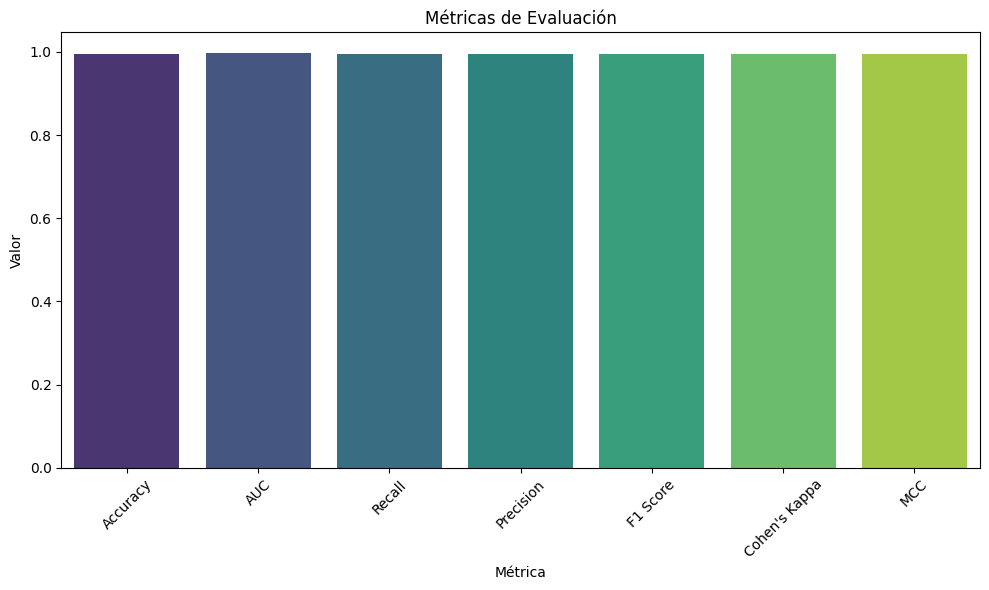

In [ ]:
show_bar_graphic(valores_smote)

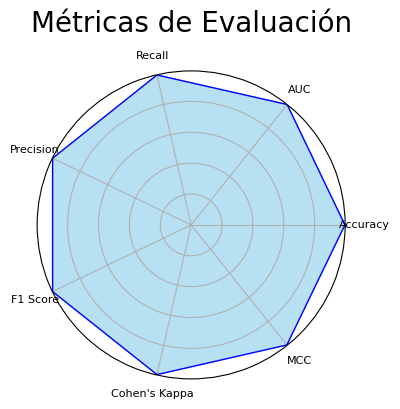

In [ ]:
show_spider_graph(valores_smote)

**Conclusión:**
Los resultados de las métricas muestran un excelente rendimiento del modelo en un dataset balanceado utilizando SMOTE.
* El accuracy del 99.59% indica una precisión muy buena en la clasificación de las clases.
* El AUC del 99.73% nos indica que el modelo tiene una capacidad casi perfecta para distinguir entre las clases.
* El recall y la precisión del 99.59% indican una capacidad muy buena para identificar y clasificar correctamente las clases positivas.
* El F1 Score del 99.59% nos muestra que existe un equilibrio alto entre precision y recall.
* Cohen's Kappa y MCC, ambos alrededor del 99.45%, demuestran una relación muy alta entre las predicciones del modelo y las clases reales.

# Elección del mejor modelo

In [ ]:
metricas = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1 Score', "Cohen's Kappa", 'MCC']

dataset_metrics = pd.DataFrame({'Métrica': metricas, 'Dataset desbalanceado': valores_unbalanced, 'Dataset balanceado': valores_smote})

dataset_metrics

,Métrica,Dataset desbalanceado,Dataset balanceado
0,Accuracy,0.984586,0.995868
1,AUC,0.964669,0.997276
2,Recall,0.984586,0.995868
3,Precision,0.984371,0.995872
4,F1 Score,0.984353,0.995866
5,Cohen's Kappa,0.965325,0.994489
6,MCC,0.965375,0.994492


## Curvas de aprendizaje

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(8, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Accuracy")

    # Configura la métrica de precisión
    accuracy_scorer = make_scorer(accuracy_score)

    train_sizes, train_scores, test_scores = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes, scoring=accuracy_scorer)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training Accuracy")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation Accuracy")
    axes.legend(loc="best")

    return plt

**Curva de aprendizaje para el modelo entrenado con el dataset desbalanceado**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

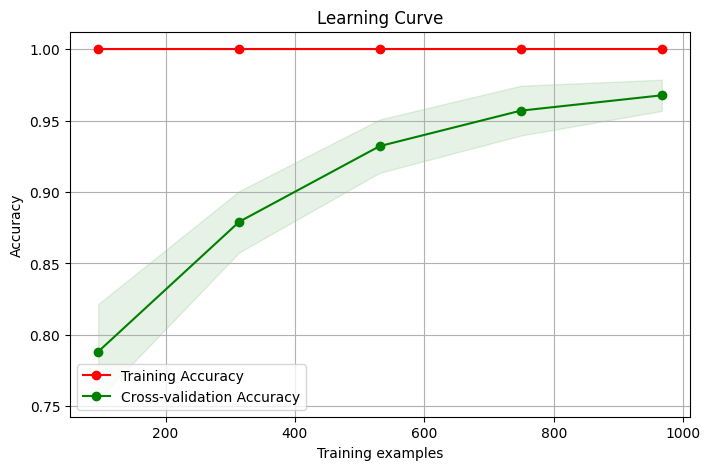

In [ ]:
plot_learning_curve(best_model_unbalanced, "Learning Curve", X_unbalanced_train, y_unbalanced_train, cv=5, n_jobs=2)

**Curva de aprendizaje para el modelo entrenado con el dataset balanceado con SMOTE**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

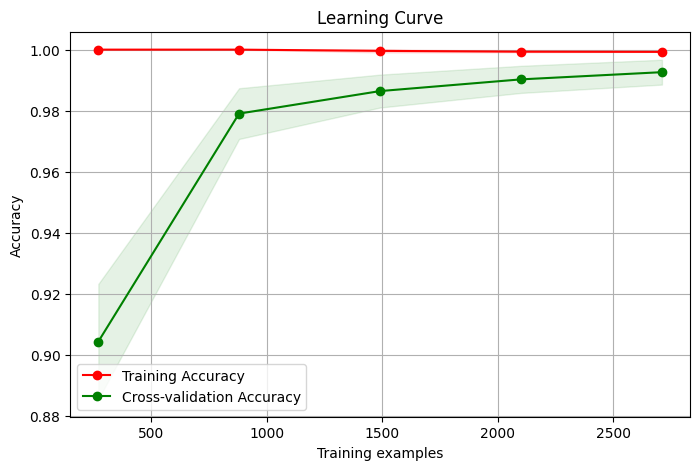

In [ ]:
plot_learning_curve(best_model_smote, "Learning Curve", X_smote_train, y_smote_train, cv=5, n_jobs=2)

## **Conclusión**
Comparando los resultados obtenidos, se puede observar que el dataset balanceado con la técnica SMOTE produjo resultados ligeramente mejores en todas las métricas evaluadas en comparación con el otro dataset. Sin embargo, a pesar de que estas diferencias son muy pequeñas y se podría decir que usar un dataset balanceado o desbalanceado no afecta mucho el rendimiento del modelo, consideramos que esto no es así y que los resultados del dataset balanceado tienen más peso, ya que cuando se usa un dataset desbalanceado, algunas métricas no son del todo confiables y existe el riesgo, por ejemplo, de un sesgo hacia una clase concreta o un rendimiento engañoso.